<h2><b>Import the libraries</b></h2>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


<h2><b>Read the data </b></h2>

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9cf008190b8346b68219c51175d93784 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EJ5syoN0wbMSMq6sjN8YaqMUwHzqAkdAcAZb1OIr2VlQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9cf008190b8346b68219c51175d93784.get_object(Bucket='datascience-donotdelete-pr-fhndrvbwcdnpan',Key='Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
pd.set_option('display.max_columns',None)
df = pd.read_csv(body)
df.head()


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.288688,47.532714,1,29800,29800,1177964,Unmatched,Block,NaN,BEACON ER AVE S BETWEEN S PORTLAND ST AND S CH...,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/11/10 00:00:00+00,11/10/2004,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4315006.0,NaN,NaN,NaN,0,0,N
1,NaN,NaN,2,115700,115700,10097005,Unmatched,NaN,NaN,NaN,NEI,"Not Enough Information, or Insufficient Locati...",0,Unknown,NaN,0,0,0,0,0,0,0,2010/04/07 00:00:00+00,4/7/2010,NaN,0.0,NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NaN,10097005.0,NaN,NaN,NaN,0,0,N
2,-122.355556,47.727318,3,1358,1358,3568600,Matched,Block,NaN,GREENWOOD AVE N BETWEEN N 134TH ST AND N 136TH ST,,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2013/04/02 00:00:00+00,4/2/2013 3:10:00 PM,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
3,-122.317563,47.618764,4,70700,70700,2806057,Matched,Block,NaN,E DENNY WAY BETWEEN 11TH AVE AND 12TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2007/03/06 00:00:00+00,3/6/2007,Mid-Block (not related to intersection),13.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Clear,Dry,Other,NaN,7065007.0,NaN,32,One parked--one moving,0,0,N
4,-122.361015,47.538551,5,53600,53600,2127310,Matched,Block,NaN,DELRIDGE WAY SW BETWEEN SW MYRTLE ST AND SW OR...,NaN,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2006/05/17 00:00:00+00,5/17/2006 4:56:00 PM,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,0,Clear,Dry,Daylight,NaN,6137017.0,NaN,14,From same direction - both going straight - on...,0,0,N


In [4]:
df.shape

(221144, 40)

In [5]:
df['LOCATION']=df['LOCATION'].str.upper()

In [6]:

loc_count=df['LOCATION'].value_counts()
print(loc_count)
accident_counts=loc_count>5
print(accident_counts)
accidents_to_keep=list(np.array(loc_count.index.values)[np.array(accident_counts)])

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                296
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          282
6TH AVE AND JAMES ST                                                                    276
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          270
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   257
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                256
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              230
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP    225
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N                                      

In [7]:
rows_before=df.shape[0]
print("Rows before removing {} ".format(rows_before))
df=df.loc[df['LOCATION'].isin(accidents_to_keep)]
rows_after=df.shape[0]
print("Rows of processed dataframe {} ".format(rows_after))
print("{} rows removed!".format(rows_before-rows_after))

Rows before removing 221144 
Rows of processed dataframe 180518 
40626 rows removed!


<h2><b>Check the missing data </b></h2>

In [8]:
missing_data=df.isnull()
missing_data

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
11,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
13,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

X
False    177909
True       2609
Name: X, dtype: int64

Y
False    177909
True       2609
Name: Y, dtype: int64

OBJECTID
False    180518
Name: OBJECTID, dtype: int64

INCKEY
False    180518
Name: INCKEY, dtype: int64

COLDETKEY
False    180518
Name: COLDETKEY, dtype: int64

REPORTNO
False    180518
Name: REPORTNO, dtype: int64

STATUS
False    180518
Name: STATUS, dtype: int64

ADDRTYPE
False    180518
Name: ADDRTYPE, dtype: int64

INTKEY
True     119689
False     60829
Name: INTKEY, dtype: int64

LOCATION
False    180518
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     99818
False    80700
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     174659
False      5859
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE
False    180518
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    180518
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    161320
True      19198
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    180518
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
Fal

<b><h4>Dropping the Redundant columns INCDATE, EXCEPTRSNDESC</h4></b>

In [10]:
df.drop("INCDATE",axis=1,inplace=True)

In [11]:
df.drop("EXCEPTRSNDESC",axis=1,inplace=True)

<b><h4>Dropping the columns INJURIES, SERIOUSINJURIES, FATALITIES as they are not necessary for analysis</h4></b>

In [12]:
df.drop(["INJURIES","SERIOUSINJURIES","FATALITIES"],axis=1,inplace=True)

In [13]:
df.shape

(180518, 35)

<h2><b> 
    
DATA WRANGLING
    
1. Dropping the missing values of columns X, Y</b></h2>

In [14]:
df.dropna(subset=["X"],axis=0,inplace=True)
df.dropna(subset=["Y"],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [15]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'SEVERITYCODE',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

<h2><b>3. Replacing intkey by its mean</b></h2>


In [16]:
df['INTKEY'].value_counts()

29973.0    276
29933.0    173
29913.0    145
29549.0    143
33512.0    136
29761.0    136
29930.0    134
29878.0    134
29380.0    126
29576.0    125
36419.0    122
29622.0    122
29052.0    121
29929.0    116
29963.0    115
29515.0    111
33135.0    109
28760.0    109
30482.0    109
28207.0    107
30410.0    106
29865.0    103
30509.0    103
29615.0    102
29579.0    101
29914.0    101
35827.0    100
28765.0    100
35828.0     99
36601.0     98
          ... 
33937.0      6
26701.0      6
30024.0      6
30025.0      6
25165.0      6
29109.0      6
36808.0      6
30053.0      6
32389.0      6
29982.0      6
25139.0      6
26791.0      6
37150.0      6
33779.0      6
33830.0      6
26844.0      6
37178.0      6
37170.0      6
29939.0      6
31325.0      6
26763.0      6
26728.0      6
37131.0      6
29944.0      6
26752.0      6
32144.0      6
25135.0      6
31313.0      6
37080.0      6
25532.0      6
Name: INTKEY, Length: 2868, dtype: int64

In [17]:
avg_intkey=df['INTKEY'].astype('float').mean(axis=0)
print(avg_intkey)

36628.780040565274


In [18]:
df['INTKEY'].replace(np.nan,avg_intkey,inplace=True)

<b><h2>4.Replacing EXCEPTRSNCODE</h2></b>

In [19]:
df['EXCEPTRSNCODE'].value_counts()

       73978
NEI     5837
Name: EXCEPTRSNCODE, dtype: int64

In [20]:
df['EXCEPTRSNCODE'].value_counts()

       73978
NEI     5837
Name: EXCEPTRSNCODE, dtype: int64

In [21]:
df['EXCEPTRSNCODE'].replace(np.nan,0,inplace=True)

In [22]:
df['EXCEPTRSNCODE'].replace("NEI",1,inplace=True)


In [23]:
df['EXCEPTRSNCODE'].replace(' ',0,inplace=True)

<b><h2>5.Replacing Collission Type</h2></b>

In [24]:
df['COLLISIONTYPE'].value_counts()

Parked Car    32729
Rear Ended    31512
Angles        29640
Other         18245
Sideswipe     17168
Left Turn     13180
Pedestrian     6854
Cycles         5009
Right Turn     2735
Head On        1826
Name: COLLISIONTYPE, dtype: int64

In [25]:
df['COLLISIONTYPE'].replace(np.nan,'Other',inplace=True)

<b><h2>6.Replacing JUNCTIONTYPE</h2></b>

In [26]:
df['JUNCTIONTYPE'].value_counts()


Mid-Block (not related to intersection)              80191
At Intersection (intersection related)               58499
Mid-Block (but intersection related)                 21213
Driveway Junction                                     9969
At Intersection (but not related to intersection)     1957
Ramp Junction                                          138
Unknown                                                 15
Name: JUNCTIONTYPE, dtype: int64

In [27]:
df['JUNCTIONTYPE'].replace(np.nan,'Not classified',inplace=True)

In [28]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              80191
At Intersection (intersection related)               58499
Mid-Block (but intersection related)                 21213
Driveway Junction                                     9969
Not classified                                        5927
At Intersection (but not related to intersection)     1957
Ramp Junction                                          138
Unknown                                                 15
Name: JUNCTIONTYPE, dtype: int64

<b><h2>7.Replacing inattentionindicator by 0 or 1 (Y)</h2></b>

In [29]:
df['INATTENTIONIND'].value_counts()
df['INATTENTIONIND'].replace(np.nan,0,inplace=True)
df['INATTENTIONIND'].replace('Y',1,inplace=True)
df['INATTENTIONIND'].head(20)

0     0
1     0
2     0
3     1
4     1
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
Name: INATTENTIONIND, dtype: int64

<b><h2>8. Replacing UNDERINFL</h2></b>

In [30]:
df['UNDERINFL'].value_counts()
df['UNDERINFL'].replace(0,'0',inplace=True)
df['UNDERINFL'].value_counts()

N    85009
0    66238
Y     4284
1     3379
Name: UNDERINFL, dtype: int64

<b><h2>9. Dropping missing values of WEATHER</h2></b>

In [31]:
df['WEATHER'].value_counts()
df.dropna(subset=["WEATHER"],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [32]:
df['WEATHER'].value_counts()

Clear                       94801
Raining                     28631
Overcast                    23639
Unknown                      9809
Snowing                       677
Other                         586
Fog/Smog/Smoke                449
Sleet/Hail/Freezing Rain       91
Blowing Sand/Dirt              37
Severe Crosswind               21
Partly Cloudy                   6
Blowing Snow                    1
Name: WEATHER, dtype: int64

<b><h2>10.Dropping missing values of ROADCOND</h2></b>

In [33]:
df['ROADCOND'].value_counts()

Dry               106294
Wet                40746
Unknown             9812
Ice                  879
Snow/Slush           711
Other                 97
Standing Water        92
Oil                   46
Sand/Mud/Dirt         35
Name: ROADCOND, dtype: int64

In [34]:
#df.dropna(subset=["ROADCOND"],axis=0,inplace=True)
#df.reset_index(drop=True, inplace=True)
df['ROADCOND'].replace(np.nan,'Not classified',inplace=True)
df['ROADCOND'].value_counts()

Dry               106294
Wet                40746
Unknown             9812
Ice                  879
Snow/Slush           711
Other                 97
Standing Water        92
Oil                   46
Not classified        36
Sand/Mud/Dirt         35
Name: ROADCOND, dtype: int64

<b><h2>11. Dropping missing values of LIGHTCOND </h2></b>

In [35]:
df['LIGHTCOND'].value_counts()

Daylight                    99774
Dark - Street Lights On     41111
Unknown                      8558
Dusk                         5052
Dawn                         2108
Dark - Street Lights Off      927
Dark - No Street Lights       890
Other                         150
Dark - Unknown Lighting        17
Name: LIGHTCOND, dtype: int64

In [36]:
df.dropna(subset=["LIGHTCOND"],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

<b><h2>12. Replacing PEDROWNOTGRNT</h2></b>

In [37]:
df['PEDROWNOTGRNT'].value_counts()
df['PEDROWNOTGRNT'].replace(np.nan,'N',inplace=True)

In [38]:
df['PEDROWNOTGRNT'].value_counts()

N    153938
Y      4649
Name: PEDROWNOTGRNT, dtype: int64

<b><h2>13. Replacing SDOTCOLNUM</h2></b>

In [39]:
df['SDOTCOLNUM'].value_counts()
avg_SDOTCOLNUM=df['SDOTCOLNUM'].astype('float').mean(axis=0)
print(avg_SDOTCOLNUM)
df['SDOTCOLNUM'].replace(np.nan,avg_SDOTCOLNUM,inplace=True)

7967834.71553258


<b><h2>14. Replacing SPEEDING</h2></b>

In [40]:
df['SPEEDING'].value_counts()
df['SPEEDING'].replace(np.nan,"N",inplace=True)

In [41]:
df['SPEEDING'].value_counts()

N    151077
Y      7510
Name: SPEEDING, dtype: int64

In [42]:
df['SPEEDING'].replace('N',0,inplace=True)
df['SPEEDING'].replace('Y',1,inplace=True)
df["SPEEDING"]=df["SPEEDING"].astype("int")

<b><h2>15. Replacing ST_COLCODE</h2></b>

In [43]:
df['ST_COLCODE'].value_counts()
df['ST_COLCODE'].replace(np.nan,0,inplace=True)

<b><h2>16. Replacing ST_COLDESC</h2></b>

In [44]:
df['ST_COLDESC'].value_counts()
df['ST_COLDESC'].replace(np.nan,'Others',inplace=True)

In [45]:
df['SEVERITYCODE'].value_counts()

1     105486
2      50182
2b      2619
3        299
0          1
Name: SEVERITYCODE, dtype: int64

Replacing Severity code of 2B by 2.5

In [46]:
df['SEVERITYCODE'].replace(3,4,inplace=True)

In [47]:
df['SEVERITYCODE'].replace("2b",3,inplace=True)

<B>Check the dtype and change if required</B>

In [48]:
df.dtypes

X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE       int64
SEVERITYCODE       object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE      float64
SDOT_COLDESC       object
INATTENTIONIND      int64
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING            int64
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

In [49]:
df[["EXCEPTRSNCODE","INATTENTIONIND","ST_COLCODE","SEVERITYCODE"]]=df[["EXCEPTRSNCODE","INATTENTIONIND","ST_COLCODE","SEVERITYCODE"]].astype("int")

<b><h2>EXPLORATORY DATA ANALYSIS </b></h2>

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Speeding and severity of accident has positive linear relation

(0, 3.1522591101901556)

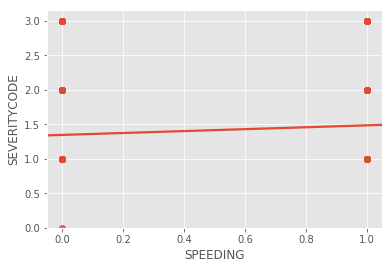

In [51]:
sns.regplot(x="SPEEDING",y="SEVERITYCODE",data=df)
plt.ylim(0,)

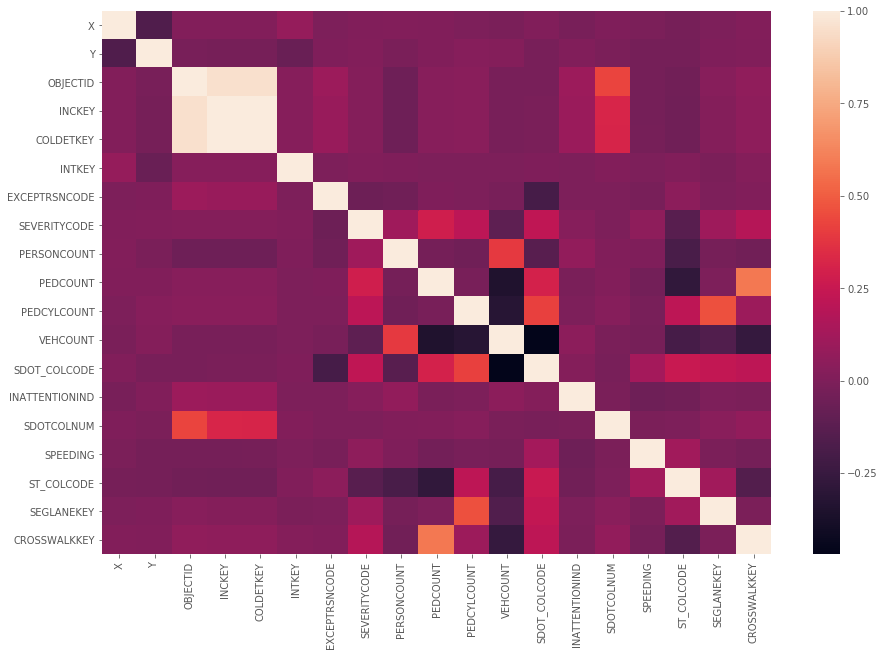

In [52]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

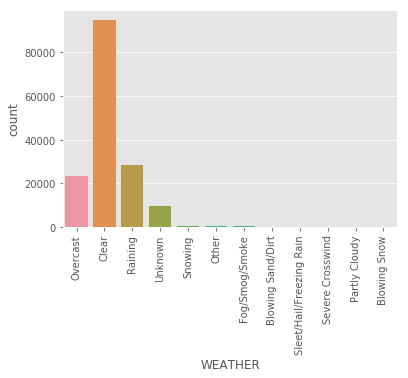

In [53]:
sns.countplot(x="WEATHER",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

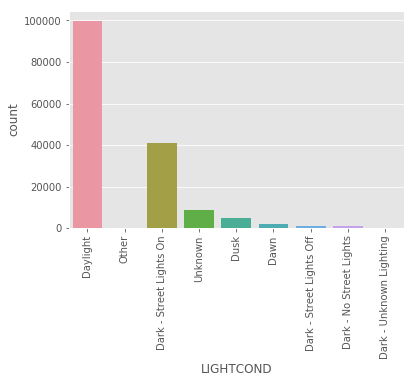

In [54]:
sns.countplot(x="LIGHTCOND",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

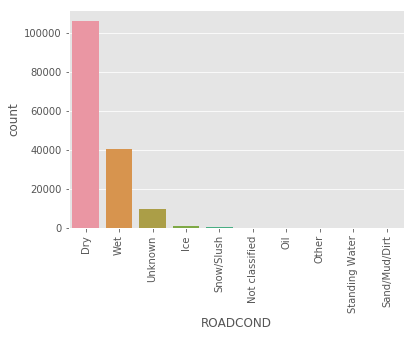

In [55]:
sns.countplot(x="ROADCOND",data=df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

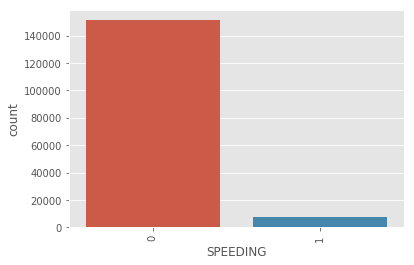

In [56]:
sns.countplot(x="SPEEDING",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

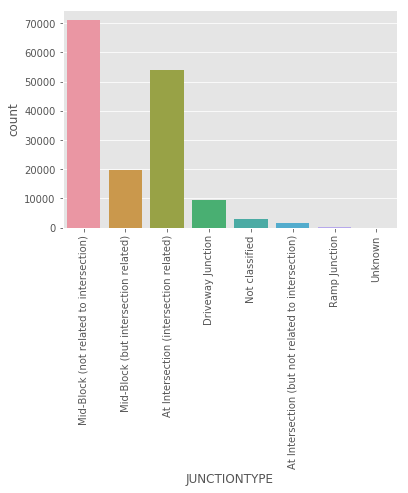

In [57]:
sns.countplot(x="JUNCTIONTYPE",data=df)
plt.xticks(rotation=90)

In [58]:
df_road=df.sort_values(["ROADCOND"],ascending=False,axis=0)
df_road['ROADCOND'].value_counts()

Dry               106184
Wet                40721
Unknown             9791
Ice                  879
Snow/Slush           708
Other                 96
Standing Water        92
Oil                   46
Sand/Mud/Dirt         35
Not classified        35
Name: ROADCOND, dtype: int64

In [59]:
df_severity=df.sort_values(["SEVERITYCODE"],ascending=False,axis=0)
df_severity

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
158586,-122.329055,47.582937,221144,318152,319652,3815388,Matched,Block,36628.780041,4TH AVE S BETWEEN S WALKER ST AND S STACY ST,0,3,Serious Injury Collision,Pedestrian,2,1,0,1,4/9/2019 4:44:00 AM,Mid-Block (not related to intersection),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,0,N,Raining,Wet,Dark - Street Lights On,N,7.967835e+06,0,0,Vehicle going straight hits pedestrian,0,0,N
12962,-122.351724,47.560306,19626,33155,33155,1076753,Matched,Block,36628.780041,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,0,3,Serious Injury Collision,Other,3,0,0,2,9/13/2005 8:49:00 AM,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,N,5.256009e+06,0,22,One car leaving driveway access,0,0,N
105521,-122.333562,47.606801,143401,162941,162961,3641513,Matched,Intersection,29949.000000,4TH AVE AND SPRING ST,0,3,Serious Injury Collision,Pedestrian,2,1,0,1,2/6/2014 2:28:00 PM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,0,N,Clear,Dry,Daylight,Y,7.967835e+06,0,2,Vehicle turning left hits pedestrian,0,521855,N
105526,-122.355567,47.732314,143412,162933,162953,3591802,Matched,Intersection,35780.000000,GREENWOOD AVE N AND N 143RD ST,0,3,Serious Injury Collision,Pedestrian,2,1,0,1,2/10/2014 8:14:00 AM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,0,N,Raining,Wet,Daylight,Y,7.967835e+06,0,2,Vehicle turning left hits pedestrian,0,522910,N
48143,-122.328634,47.708629,64063,79039,79039,2829517,Matched,Intersection,36586.000000,1ST AVE NE AND NE NORTHGATE WAY,0,3,Serious Injury Collision,Left Turn,5,0,0,2,8/12/2007 6:15:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,N,7.224009e+06,0,28,From opposite direction - one left turn - one ...,0,0,N
105529,-122.336266,47.654981,143416,165832,165846,3572494,Matched,Block,36628.780041,WALLINGFORD AVE N BETWEEN N 39TH ST AND N 40TH ST,0,3,Serious Injury Collision,Cycles,2,0,1,1,4/11/2014 7:22:00 AM,Mid-Block (not related to intersection),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",0,N,Clear,Dry,Daylight,N,7.967835e+06,0,45,Vehicle - Pedalcyclist,6189,0,N
81807,-122.270726,47.538907,108913,123160,123160,3374038,Matched,Intersection,34452.000000,RAINIER AVE S AND S MYRTLE ST,0,3,Fatality Collision,Angles,2,0,0,2,4/5/2011 6:33:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,N,Clear,Dry,Daylight,N,1.109502e+07,1,10,Entering at angle,0,0,N
2563,-122.340892,47.612398,3682,17538,17538,1213200,Matched,Intersection,29563.000000,3RD AVE AND VIRGINIA ST,0,3,Serious Injury Collision,Pedestrian,2,1,0,1,2/14/2004 1:49:00 PM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,0,0,Clear,Dry,Daylight,Y,4.045040e+06,0,1,Vehicle turning right hits pedestrian,0,0,N
144888,-122.344522,47.690563,200256,332807,334307,EA49700,Matched,Intersection,37367.000000,AURORA AVE N AND N 85TH ST,0,3,Serious Injury Collision,Pedestrian,2,1,0,1,6/29/2020 12:10:00 PM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,0,N,Clear,Dry,Daylight,N,7.967835e+06,0,0,Vehicle going straight hits pedestrian,0,0,N
93400,-122.354876,47.615034,125039,139183,139183,3328148,Matched,Intersection,29679.000000,ALASKAN WAY AND BROAD ST,0,3,Serious Injury Collision,Cycles,2,0,1,1,7/30/2012 5:09:00 PM,At Intersection (intersection related),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",0,N,Clear,Dry,Daylight,Y,1.221201e+07,0,45,Vehicle - Pedalcyclist,0,0,N


In [60]:
list_roadcond=['Wet','Dry','Unknown','Ice','Snow/Slush','Standing Water','Other','Oil','Sand/Mud/Dirt']

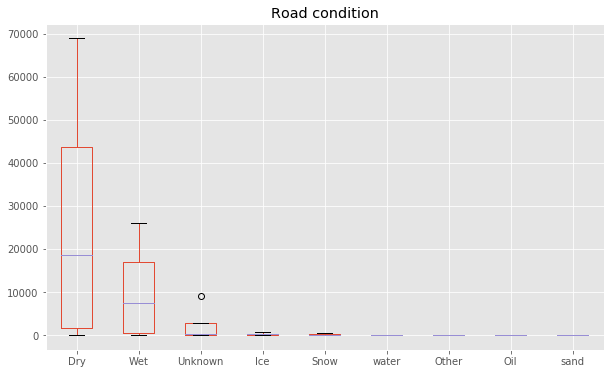

In [61]:
df_dry=df_severity[df_severity['ROADCOND']=='Dry']
df_dry_count=df_dry.groupby("SEVERITYCODE")['ROADCOND'].count()

df_wet=df_severity[df_severity['ROADCOND']=='Wet']
df_wet_count=df_wet.groupby("SEVERITYCODE")['ROADCOND'].count()

df_unk=df_severity[df_severity['ROADCOND']=='Unknown']
df_unk_count=df_unk.groupby("SEVERITYCODE")['ROADCOND'].count()

df_ice=df_severity[df_severity['ROADCOND']=='Ice']
df_ice_count=df_ice.groupby("SEVERITYCODE")['ROADCOND'].count()

df_sno=df_severity[df_severity['ROADCOND']=='Snow/Slush']
df_sno_count=df_sno.groupby("SEVERITYCODE")['ROADCOND'].count()

df_wat=df_severity[df_severity['ROADCOND']=='Standing Water']
df_wat_count=df_wat.groupby("SEVERITYCODE")['ROADCOND'].count()


df_oth=df_severity[df_severity['ROADCOND']=='Other']
df_oth_count=df_oth.groupby("SEVERITYCODE")['ROADCOND'].count()


df_oil=df_severity[df_severity['ROADCOND']=='Oil']
df_oil_count=df_oil.groupby("SEVERITYCODE")['ROADCOND'].count()


df_san=df_severity[df_severity['ROADCOND']=='Sand/Mud/Dirt']
df_san_count=df_san.groupby("SEVERITYCODE")['ROADCOND'].count()

new_df=pd.DataFrame({'Dry':df_dry_count,'Wet':df_wet_count,'Unknown':df_unk_count,'Ice':df_ice_count,'Snow':df_sno_count,'water':df_wat_count,'Other':df_oth_count,'Oil':df_oil_count,'sand':df_san_count})
new_df.replace(np.nan,0,inplace=True)
new_df.head(20)

new_df.plot(kind="box",figsize=(10,6))
plt.title("Road condition")
plt.show()

In [62]:
new_df.columns


Index(['Dry', 'Wet', 'Unknown', 'Ice', 'Snow', 'water', 'Other', 'Oil',
       'sand'],
      dtype='object')

In [63]:
new_df.head(10)

,Dry,Wet,Unknown,Ice,Snow,water,Other,Oil,sand
SEVERITYCODE,,,,,,,,,
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68908.0,26049,9134.0,635.0,566.0,65.0,59.0,29.0,18.0
2,35153.0,13930,632.0,228.0,135.0,25.0,34.0,17.0,17.0
3,2123.0,741,25.0,16.0,7.0,2.0,3.0,0.0,0.0


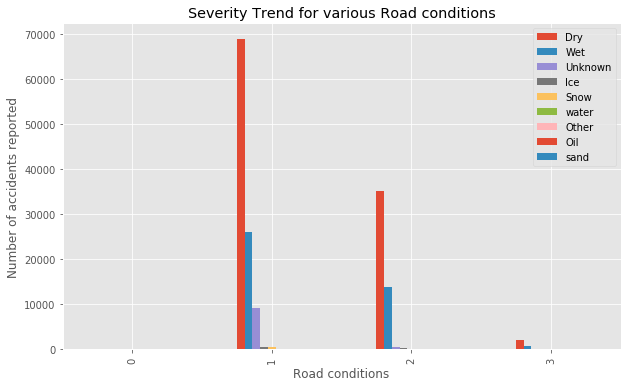

In [64]:

new_df.plot(kind="bar",figsize=(10,6))
plt.title('Severity Trend for various Road conditions')
plt.ylabel('Number of accidents reported')
plt.xlabel('Road conditions')
plt.show()

Weather analysis

In [65]:
df['WEATHER'].value_counts()

Clear                       94706
Raining                     28612
Overcast                    23623
Unknown                      9788
Snowing                       672
Other                         581
Fog/Smog/Smoke                449
Sleet/Hail/Freezing Rain       91
Blowing Sand/Dirt              37
Severe Crosswind               21
Partly Cloudy                   6
Blowing Snow                    1
Name: WEATHER, dtype: int64

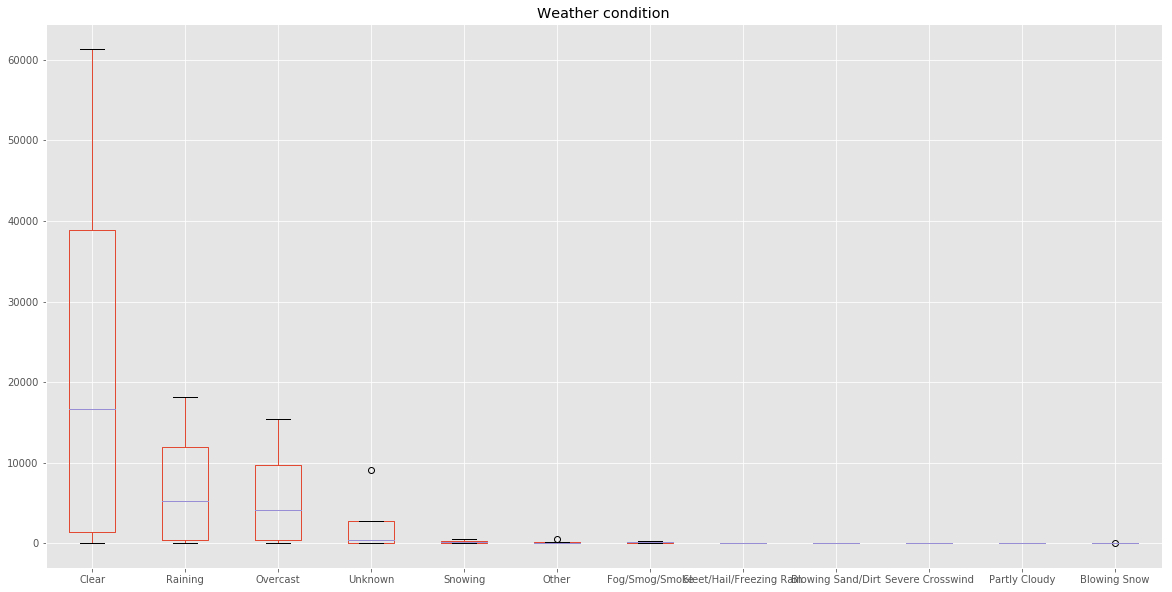

In [66]:
df_clear=df_severity[df_severity['WEATHER']=='Clear']
df_clear_count=df_clear.groupby("SEVERITYCODE")['WEATHER'].count()

df_rain=df_severity[df_severity['WEATHER']=='Raining']
df_rain_count=df_rain.groupby("SEVERITYCODE")['WEATHER'].count()

df_ovr=df_severity[df_severity['WEATHER']=='Overcast']
df_ovr_count=df_ovr.groupby("SEVERITYCODE")['WEATHER'].count()

df_unkw=df_severity[df_severity['WEATHER']=='Unknown']
df_unkw_count=df_unkw.groupby("SEVERITYCODE")['WEATHER'].count()

df_snw=df_severity[df_severity['WEATHER']=='Snowing']
df_snw_count=df_snw.groupby("SEVERITYCODE")['WEATHER'].count()

df_othw=df_severity[df_severity['WEATHER']=='Other']
df_othw_count=df_othw.groupby("SEVERITYCODE")['WEATHER'].count()

df_fog=df_severity[df_severity['WEATHER']=='Fog/Smog/Smoke']
df_fog_count=df_fog.groupby("SEVERITYCODE")['WEATHER'].count()

df_sleet=df_severity[df_severity['WEATHER']=='Sleet/Hail/Freezing Rain']
df_sleet_count=df_sleet.groupby("SEVERITYCODE")['WEATHER'].count()

df_blw=df_severity[df_severity['WEATHER']=='Blowing Sand/Dirt']
df_blw_count=df_blw.groupby("SEVERITYCODE")['WEATHER'].count()


df_sev=df_severity[df_severity['WEATHER']=='Severe Crosswind']
df_sev_count=df_sev.groupby("SEVERITYCODE")['WEATHER'].count()

df_prt=df_severity[df_severity['WEATHER']=='Partly Cloudy']
df_prt_count=df_prt.groupby("SEVERITYCODE")['WEATHER'].count()

df_blwd=df_severity[df_severity['WEATHER']=='Blowing Snow']
df_blwd_count=df_blwd.groupby("SEVERITYCODE")['WEATHER'].count()




df_weather=pd.DataFrame({'Clear':df_clear_count,'Raining':df_rain_count,'Overcast':df_ovr_count,'Unknown':df_unkw_count,'Snowing':df_snw_count,'Other':df_othw_count,'Fog/Smog/Smoke':df_fog_count,'Sleet/Hail/Freezing Rain':df_sleet_count,'Blowing Sand/Dirt':df_blw_count,'Severe Crosswind':df_sev_count,'Partly Cloudy':df_prt_count,'Blowing Snow':df_blwd_count})
df_weather.replace(np.nan,0,inplace=True)
df_weather.head(20)

df_weather.plot(kind="box",figsize=(20,10))
plt.title("Weather condition")
plt.show()

In [67]:
df_weather.head()

,Clear,Raining,Overcast,Unknown,Snowing,Other,Fog/Smog/Smoke,Sleet/Hail/Freezing Rain,Blowing Sand/Dirt,Severe Crosswind,Partly Cloudy,Blowing Snow
SEVERITYCODE,,,,,,,,,,,,
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61374.0,18177,15470.0,9081.0,519.0,473.0,285.0,66.0,25.0,13.0,3.0,0.0
2,31436.0,9913,7713.0,673.0,144.0,99.0,159.0,23.0,12.0,7.0,3.0,0.0
3,1896.0,521,440.0,34.0,9.0,9.0,5.0,2.0,0.0,1.0,0.0,1.0


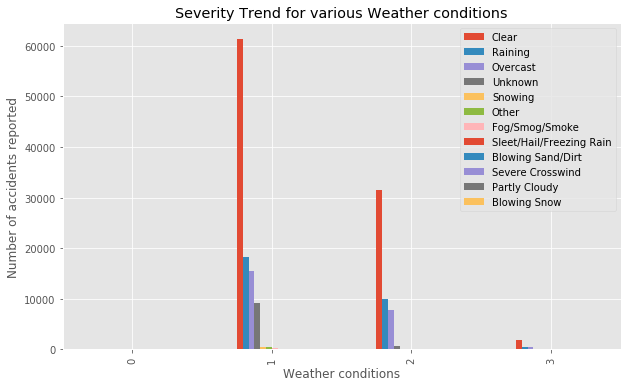

In [68]:

df_weather.plot(kind="bar",figsize=(10,6))
plt.title('Severity Trend for various Weather conditions')
plt.ylabel('Number of accidents reported')
plt.xlabel('Weather conditions')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f615455ef98>]],
      dtype=object)

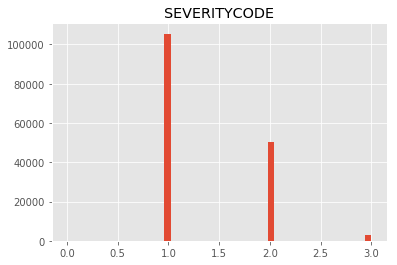

In [69]:
df.hist(column="SEVERITYCODE",bins=50)


In [70]:
list_speeding={0,1}
df_no=df_severity[df_severity['SPEEDING']==0]
df_no_count=df_no.groupby("SEVERITYCODE")['SPEEDING'].count()
df_yes=df_severity[df_severity['SPEEDING']==1]
df_yes_count=df_yes.groupby("SEVERITYCODE")['SPEEDING'].count()
new_df_speeding=pd.DataFrame({"No":df_no_count,"Yes":df_yes_count})
new_df_speeding.replace(np.nan,0,inplace=True)
new_df_speeding.head()


,No,Yes
SEVERITYCODE,,
0,1,0.0
1,101251,4235.0
2,47278,2904.0
3,2547,371.0


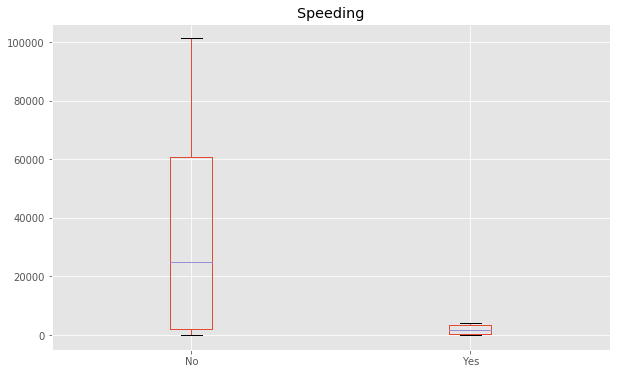

In [71]:

new_df_speeding.plot(kind="box",figsize=(10,6))
plt.title("Speeding")
plt.show()

<Figure size 432x288 with 0 Axes>

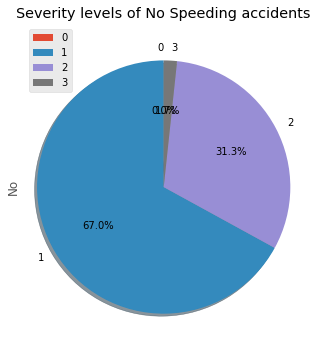

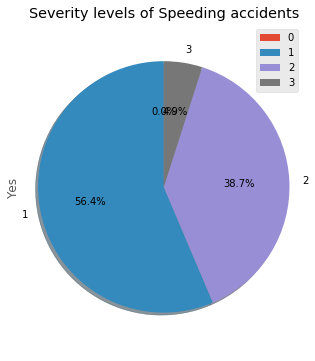

In [72]:
fig = plt.figure()
new_df_speeding.plot(kind='pie',
figsize=(5, 6),
autopct='%1.1f%%', # add in percentages
startangle=90,
shadow=True,
y="No")
plt.title('Severity levels of No Speeding accidents')
plt.axis('equal')  



new_df_speeding.plot(kind='pie',
figsize=(5, 6),
autopct='%1.1f%%', # add in percentages
startangle=90,
shadow=True,
y="Yes")
plt.title('Severity levels of Speeding accidents')
plt.axis('equal')

plt.show()



In [73]:
X=df[['X', 'Y','SEVERITYCODE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER', 'ROADCOND','LIGHTCOND', 'SPEEDING']].values
X[0:5]

array([[-122.35555594209299, 47.7273177900175, 1, 2, 2,
        'Mid-Block (not related to intersection)', 'Overcast', 'Dry',
        'Daylight', 0],
       [-122.317562617498, 47.6187637305668, 1, 2, 2,
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Other', 0],
       [-122.361014916682, 47.5385507842185, 1, 2, 2,
        'Mid-Block (but intersection related)', 'Clear', 'Dry',
        'Daylight', 0],
       [-122.38677160689501, 47.5647203004631, 2, 4, 2,
        'At Intersection (intersection related)', 'Clear', 'Dry',
        'Daylight', 0],
       [-122.356919302075, 47.638989178092295, 1, 2, 2,
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight', 0]], dtype=object)

(0, 97.66243127264792)

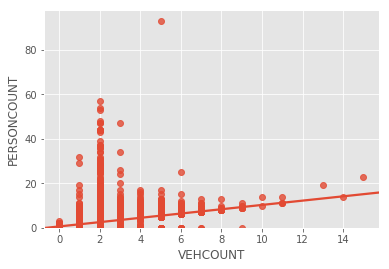

In [74]:
sns.regplot(x="VEHCOUNT",y="PERSONCOUNT",data=df)
plt.ylim(0,)

In [75]:
df[['SPEEDING','SEVERITYCODE']].corr()

,SPEEDING,SEVERITYCODE
SPEEDING,1.000000,0.057254
SEVERITYCODE,0.057254,1.000000


In [76]:
df_sub=df[['X','Y','SEVERITYCODE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
df_sub.head(5)

,X,Y,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,-122.355556,47.727318,1,2,2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,0
1,-122.317563,47.618764,1,2,2,Mid-Block (not related to intersection),Clear,Dry,Other,0
2,-122.361015,47.538551,1,2,2,Mid-Block (but intersection related),Clear,Dry,Daylight,0
3,-122.386772,47.564720,2,4,2,At Intersection (intersection related),Clear,Dry,Daylight,0
4,-122.356919,47.638989,1,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,0


In [77]:
df_sub['X']=df_sub['X']/df_sub['X'].max()
df_sub['Y']=df_sub['Y']/df_sub['Y'].max()
df_sub.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,X,Y,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,1.000954,0.999857,1,2,2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,0
1,1.000643,0.997583,1,2,2,Mid-Block (not related to intersection),Clear,Dry,Other,0
2,1.000999,0.995903,1,2,2,Mid-Block (but intersection related),Clear,Dry,Daylight,0
3,1.001209,0.996451,2,4,2,At Intersection (intersection related),Clear,Dry,Daylight,0
4,1.000965,0.998007,1,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,0


In [78]:
dummy_junction=pd.get_dummies(df_sub['JUNCTIONTYPE'])
dummy_junction.rename(columns={"Unknown":"Junction Unknown"},inplace=True)
dummy_junction.head()

,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Not classified,Ramp Junction,Junction Unknown
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [79]:
dummy_roadcond=pd.get_dummies(df_sub['ROADCOND'])
dummy_roadcond.rename(columns={"Not classified":"Road condition Not classified","Other":"Roadcond other"},inplace=True)
dummy_roadcond.head()

,Dry,Ice,Road condition Not classified,Oil,Roadcond other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [80]:
dummy_lightcond=pd.get_dummies(df_sub['LIGHTCOND'])
dummy_lightcond.rename(columns={"Unknown":"Light condition Unknown","Other":"Lightcond other"},inplace=True)
dummy_lightcond.head()

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Lightcond other,Light condition Unknown
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [81]:
dummy_weather=pd.get_dummies(df_sub['WEATHER'])
dummy_weather.rename(columns={"Unknown":"Weather Unknown","Other":"Weather Other"},inplace=True)
dummy_weather.head()

,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Weather Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Weather Unknown
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [82]:
df_sub=pd.concat([df_sub,dummy_junction,dummy_roadcond,dummy_lightcond,dummy_weather],axis=1)

In [83]:
df_sub.drop(["WEATHER","ROADCOND","LIGHTCOND",'JUNCTIONTYPE'],axis=1,inplace=True)

In [84]:
X=np.asarray(df_sub[['X', 'Y', 'PERSONCOUNT', 'VEHCOUNT', 'SPEEDING',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Not classified',
       'Ramp Junction', 'Junction Unknown', 'Dry', 'Ice',
       'Road condition Not classified', 'Oil', 'Roadcond other',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Lightcond other', 'Light condition Unknown',
       'Blowing Sand/Dirt', 'Blowing Snow', 'Clear', 'Fog/Smog/Smoke',
       'Weather Other', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Weather Unknown']])
X[0:5]

array([[1.00095392, 0.99985715, 2.        , 2.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.00064311, 0.99758301, 2.        , 2.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0. 

In [85]:
y=np.asarray(df_sub['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 2, 1])

In [86]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 8.94351218e-01,  1.95701184e+00, -3.69160259e-01,
         4.38389507e-02, -2.22956836e-01, -1.02536691e-01,
        -7.17684293e-01, -2.49762909e-01, -3.76280644e-01,
         1.11112348e+00, -1.37532110e-01, -2.80861648e-02,
        -5.02228878e-03,  7.02503568e-01, -7.46564914e-02,
        -1.48575828e-02, -1.70336657e-02, -2.46112297e-02,
        -1.48575828e-02, -6.69660134e-02, -2.40927365e-02,
        -2.56518031e-01, -5.87780190e-01, -7.51247929e-02,
        -7.66794706e-02, -5.91567689e-01, -1.03541380e-02,
        -1.16066603e-01,  7.67764407e-01, -1.81396112e-01,
        -3.07692793e-02, -2.38835310e-01, -1.52762845e-02,
        -2.51112064e-03, -1.21759511e+00, -5.32850097e-02,
        -6.06388947e-02,  2.39023965e+00, -6.15106121e-03,
        -4.69185082e-01, -1.15081261e-02, -2.39613644e-02,
        -6.52338400e-02, -2.56476143e-01],
       [-4.49446474e-01, -7.31897700e-03, -3.69160259e-01,
         4.38389507e-02, -2.22956836e-01, -1.02536691e-01,
        -7.17

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (126869, 44) (126869,)
Test set: (31718, 44) (31718,)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 2, ..., 1, 2, 1])

In [90]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.00431261, 0.61090555, 0.36294887, 0.02183296],
       [0.0042907 , 0.66239   , 0.31468486, 0.01863444],
       [0.00427229, 0.44496967, 0.48138387, 0.06937416],
       ...,
       [0.00426012, 0.6082285 , 0.37556751, 0.01194387],
       [0.00429742, 0.42233875, 0.51842812, 0.0549357 ],
       [0.0042666 , 0.62247983, 0.36369076, 0.00956281]])

In [91]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6883473106753263

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.70      0.95      0.80     20991
           2       0.60      0.20      0.30     10107
           3       0.00      0.00      0.00       620

   micro avg       0.69      0.69      0.69     31718
   macro avg       0.43      0.38      0.37     31718
weighted avg       0.65      0.69      0.63     31718



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
